In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
df = pd.read_csv('predict_energy_consumption(in).csv')
df.head()

,temperature,humidity,wind_speed,solar_irradiance,energy_consumption
0,24.363503,31.107976,5.234114,705.432695,307.398145
1,38.767858,52.514057,4.939576,817.013258,412.444548
2,33.299849,72.376750,18.125092,325.421109,392.072418
3,29.966462,63.933493,4.990924,662.386690,119.254957
4,18.900466,68.393669,5.438995,614.571385,117.162261


In [3]:
df.columns

Index(['temperature', 'humidity', 'wind_speed', 'solar_irradiance',
       'energy_consumption'],
      dtype='object')

In [4]:
X=df[['temperature', 'humidity', 'wind_speed', 'solar_irradiance']]
y=df['energy_consumption'].values

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
model = Sequential([
    Dense(64,activation='relu',input_shape=(X_train.shape[1],)),
    Dense(32,activation='relu'),
    Dense(1)
])

C:\Users\rathi\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.compile(optimizer='adam',loss='mse',metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,433 (9.50 KB)

 Trainable params: 2,433 (9.50 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
history = model.fit(X_train,y_train,epochs=50,batch_size=32,validation_split=0.2,verbose=1,)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.0000e+00 - loss: 87650.1641 - val_accuracy: 0.0000e+00 - val_loss: 83643.7031
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: 89967.7500 - val_accuracy: 0.0000e+00 - val_loss: 83060.2500
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0000e+00 - loss: 82276.3828 - val_accuracy: 0.0000e+00 - val_loss: 82199.1328
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0000e+00 - loss: 91156.1484 - val_accuracy: 0.0000e+00 - val_loss: 80892.4453
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: 87379.5469 - val_accuracy: 0.0000e+00 - val_loss: 78996.7891
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: 86858.9141 - val_accuracy: 0.0000e+00 - val_loss: 76320.2578
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: 80744.5078 - val_accuracy: 0.0000e+00 - val_loss: 72751.8750
Epoch

In [21]:
test_loss,test_mae = model.evaluate(X_test,y_test,verbose=1)
print(f"Test Mean Absolute Error :{test_mae:.2f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.0000e+00 - loss: 18133.3281
Test Mean Absolute Error :0.00


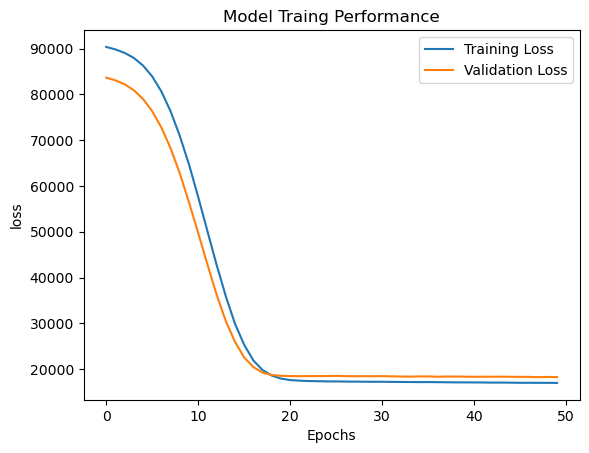

In [23]:
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.title('Model Traing Performance')
plt.legend()
plt.show()

In [25]:
pred = model.predict(X_test)
pred

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


array([[289.86597],
       [247.36208],
       [271.8775 ],
       [210.66866],
       [351.64337],
       [298.02966],
       [324.12634],
       [284.903  ],
       [283.24078],
       [289.6429 ],
       [231.26456],
       [259.76294],
       [284.0999 ],
       [238.53752],
       [290.54486],
       [304.91925],
       [261.11584],
       [307.90857],
       [298.74536],
       [240.9886 ],
       [280.4786 ],
       [288.21417],
       [280.83365],
       [277.315  ],
       [249.88576],
       [244.39299],
       [261.64285],
       [322.9681 ],
       [308.96106],
       [260.70193],
       [235.66203],
       [301.15387],
       [296.5562 ],
       [273.46613],
       [311.28403],
       [285.82745],
       [215.67094],
       [257.79742],
       [285.10004],
       [253.15833],
       [251.64284],
       [255.07475],
       [247.20177],
       [252.59972],
       [265.7924 ],
       [255.91573],
       [280.50317],
       [242.8408 ],
       [287.6019 ],
       [297.40762],


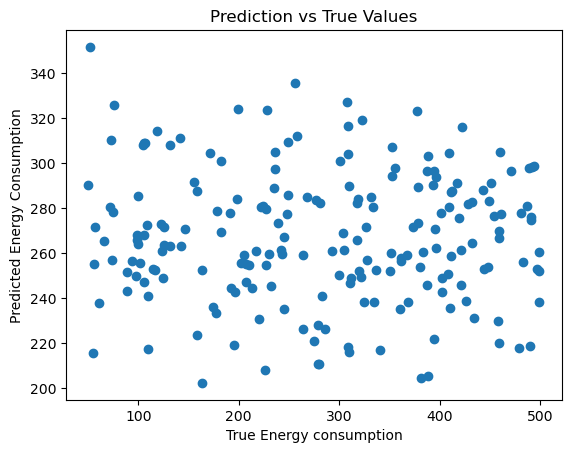

In [29]:
plt.scatter(y_test,pred)
plt.xlabel('True Energy consumption')
plt.ylabel('Predicted Energy Consumption')
plt.title('Prediction vs True Values')
plt.show()